# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/DOGE-USD.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       365 non-null    float64
 2   High       365 non-null    float64
 3   Low        365 non-null    float64
 4   Close      365 non-null    float64
 5   Adj Close  365 non-null    float64
 6   Volume     365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [4]:
df.describe

<bound method NDFrame.describe of            Date      Open      High       Low     Close  Adj Close  \
0    2021-12-04  0.200356  0.200562  0.132826  0.178853   0.178853   
1    2021-12-05  0.178263  0.181133  0.162949  0.171255   0.171255   
2    2021-12-06  0.171383  0.180527  0.159558  0.178400   0.178400   
3    2021-12-07  0.178374  0.183539  0.175505  0.176805   0.176805   
4    2021-12-08  0.176609  0.182168  0.172630  0.179151   0.179151   
..          ...       ...       ...       ...       ...        ...   
361  2022-11-30  0.101827  0.108942  0.100304  0.106860   0.106860   
362  2022-12-01  0.106857  0.107381  0.101071  0.101584   0.101584   
363  2022-12-02  0.101594  0.103260  0.097639  0.102148   0.102148   
364  2022-12-03  0.102150  0.102823  0.098651  0.099824   0.099824   
365  2022-12-04       NaN       NaN       NaN       NaN        NaN   

           Volume  
0    4.388514e+09  
1    1.645331e+09  
2    1.896979e+09  
3    1.085087e+09  
4    1.014713e+09  
..   

In [5]:
import plotly.offline as py
import plotly.graph_objs as go

In [6]:
py.init_notebook_mode(connected=True)

In [8]:
df = [go.Candlestick(x=df.index,
                       open=df.Open,
                       high=df.High,
                       low=df.Low,
                       close=df.Close)]

In [9]:
layout = go.Layout(title='DOGE-USB Candlestick with Range Slider',
                   xaxis={'rangeslider':{'visible':True}})

# Plotting graph

In [10]:
fig = go.Figure(data=df,layout=layout)
py.iplot(fig,filename='DOGE-USD_candlestick')


# Performing Binomial Method

In [11]:
from __future__ import print_function, division

%matplotlib inline
%precision 4

import matplotlib.pyplot as plt

import numpy as np

In [12]:
from inspect import getsourcelines

def shw_cd(func):
    lines, _ = getsourcelines(func)
    for line in lines:
        print(line, end='')

In [13]:
class Pmf:
    
    def __init__(self, e=None):
        """Initializes the distribution.

        d: map from values to probabilities
        """
        self.d = {} if e is None else e

    def items(self):
        """Returns a sequence of (value, prob) pairs."""
        return self.e.items()
    
    def __repr__(self):
        """Returns a string representation of the object."""
        cls = self.__class__.__name__
        return '%s(%s)' % (cls, repr(self.e))

    def __getitem__(self, value):
        """Looks up the probability of a value."""
        return self.d.get(value, 0)

    def __setitem__(self, value, prob):
        """Sets the probability associated with a value."""
        self.e[value] = prob

    def __add__(self, other):
        """Computes the Pmf of the sum of values drawn from self and other.

        other: another Pmf or a scalar

        returns: new Pmf
        """
        if other == 0:
            return self

        pmf = Pmf()
        for v1, p1 in self.items():
            for v2, p2 in other.items():
                pmf[v1 + v2] += p1 * p2
        return pmf
    
    __radd__ = __add__

    def total(self):
        """Returns the total of the probabilities."""
        return sum(self.d.values())

    def normalize(self):
        """Normalizes this PMF so the sum of all probs is 1.

        Args:
            fraction: what the total should be after normalization

        Returns: the total probability before normalizing
        """
        total = self.total()
        for x in self.d:
            self.d[x] /= total
        return total
    
    def mean(self):
        """Computes the mean of a PMF."""
        return sum(p * x for x, p in self.items())

    def var(self, mu=None):
        """Computes the variance of a PMF.

        mu: the point around which the variance is computed;
                if omitted, computes the mean
        """
        if mu is None:
            mu = self.mean()

        return sum(p * (x - mu) ** 2 for x, p in self.items())

    def expect(self, func):
        """Computes the expectation of a given function, E[f(x)]

        func: function
        """
        return sum(p * func(x) for x, p in self.items())

    def display(self):
        """Displays the values and probabilities."""
        for value, prob in self.items():
            print(value, prob)
            
    def plot_pmf(self, **options):
        """Plots the values and probabilities."""
        xs, ps = zip(*sorted(self.items()))
        plt.plot(xs, ps, **options)

In [ ]:
twice = coin + coin
twice.display()


In [ ]:
thrice = sum([coin]*6)
thrice.display()

In [ ]:
from collections import Counter

for val, prob in sorted(thrice.items()):
    heads = val.count('H')
    print(heads, prob)

In [ ]:
def make_pmf_heads(coin, n):
    coins = sum([coin]*n)
    pmf = pmf()
    for val, prob in coins.items():
        heads = val.count('H')
        pmf[heads] += prob
    return pmf

In [ ]:
pmf_heads = make_pmf_heads(coin, 6)
pmf_heads.display()

# Plotting graph

In [ ]:
n = 17
%time make_pmf_heads(coin, n).plot_pmf()

In [ ]:
from sympy import symbols

p = symbols('p')
sym_coin = pmf(dict(H=p, T=1-p))
sym_coin.display()

In [ ]:
make_pmf_heads(sym_coin, 6).display()

In [ ]:
make_pmf_heads(sym_coin, 6).display()

In [ ]:
make_pmf_heads(sym_coin, 7).display()

In [ ]:
fair_coin = pmf(dict(H=p, T=p))
fair_coin.display()

In [ ]:
thrice = sum([fair_coin]*6)
thrice.display()

In [ ]:
pmf_heads = make_pmf_heads(fair_coin, 6)
pmf_heads.display()

In [ ]:
for val, prob in pmf_heads.items():
    print(val, prob / p**6)

In [ ]:
def coefficients(n):
    fair_coin = pmf(dict(H=p, T=p))
    pmf_heads = make_pmf_heads(fair_coin, n)
    for val, prob in pmf_heads.items():
        print(prob / p**n, end=' ')
    print()

In [ ]:
coefficients(6)

In [ ]:
for n in range(1, 16):
    coefficients(n)

In [ ]:
def binomial_coefficient(n, k):
    if k==0 or k==n:
        return 1
    return binomial_coefficient(n-1, k) + binomial_coefficient(n-1, k-1)

In [ ]:
from scipy.special import binom
binom(5, 7)

In [ ]:
from scipy.special import binom

def eval_binomial_pmf(k, n, p):
    return binom(n, k) * p**k * (1-p)**(n-k)

In [ ]:
n = 4
p = 0.2

for k in range(n+1):
    print(k, eval_binomial_pmf(k, n, p))

# Vanilla Option

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

In [40]:
avg = 2
std_dev = .2
num_reps = 500
num_simulations = 1000

In [41]:
pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)


In [42]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)

In [43]:
df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                               'Sales_Target': sales_target})

df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']

In [44]:
def calc_Requition_rate(x):
    if x <= .91:
        return .01
    if x <= .98:
        return .02
    else:
        return .06

In [45]:
df['Requition_Rate'] = df['Pct_To_Target'].apply(calc_Requition_rate)
df['Requition_Amount'] = df['Requition_Rate'] * df['Sales']

In [46]:
all_stats = []
for i in range(num_simulations):
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    pct_to_target = np.random.normal(avg, std_dev, num_reps).round(2)
    df = pd.DataFrame(index=range(num_reps), data={'Pct_To_Target': pct_to_target,
                                                   'Sales_Target': sales_target})
    df['Sales'] = df['Pct_To_Target'] * df['Sales_Target']
    df['Requition_Rate'] = df['Pct_To_Target'].apply(calc_Requition_rate)
    df['Requition_Amount'] = df['Requition_Rate'] * df['Sales']
    all_stats.append([df['Sales'].sum().round(0),
                      df['Requition_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])

In [47]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Requition_Amount',
                                                           'Sales_Target'])

In [48]:
results_df.describe().style.format('{:,}')

,Sales,Requition_Amount,Sales_Target
count,"1,000.0","1,000.0","1,000.0"
mean,"167,620,025.0","10,057,201.5","83,858,225.0"
std,"5,381,285.318878984","322,877.1191327429","2,636,905.144884457"
min,"151,299,000.0","9,077,940.0","76,075,000.0"
25%,"163,951,875.0","9,837,112.5","82,050,000.0"
50%,"167,364,625.0","10,041,877.5","83,750,000.0"
75%,"171,114,312.5","10,266,858.75","85,575,000.0"
max,"189,125,500.0","11,347,530.0","94,250,000.0"


In [49]:
results_df

,Sales,Requition_Amount,Sales_Target
0,168438500.0,10106310.0,83800000
1,154626750.0,9277605.0,77175000
2,160769750.0,9646185.0,80475000
3,158394750.0,9503685.0,79375000
4,163312750.0,9798765.0,81725000
...,...,...,...
995,172068750.0,10324125.0,85825000
996,170136250.0,10208175.0,84450000
997,175906500.0,10554390.0,88000000
998,162260750.0,9735645.0,81450000


# Heatmap Plotting

In [36]:
import seaborn as sns 

<AxesSubplot:>

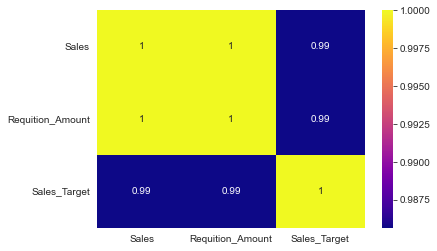

In [39]:
sns.heatmap(results_df.corr(), annot=True, cmap="plasma")

<AxesSubplot:xlabel='Sales'>

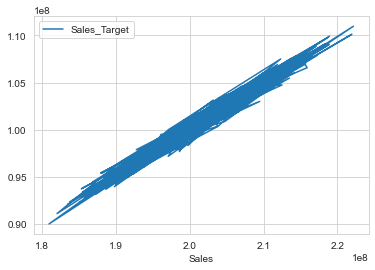

In [38]:
results_df.plot(x="Sales", y="Sales_Target")